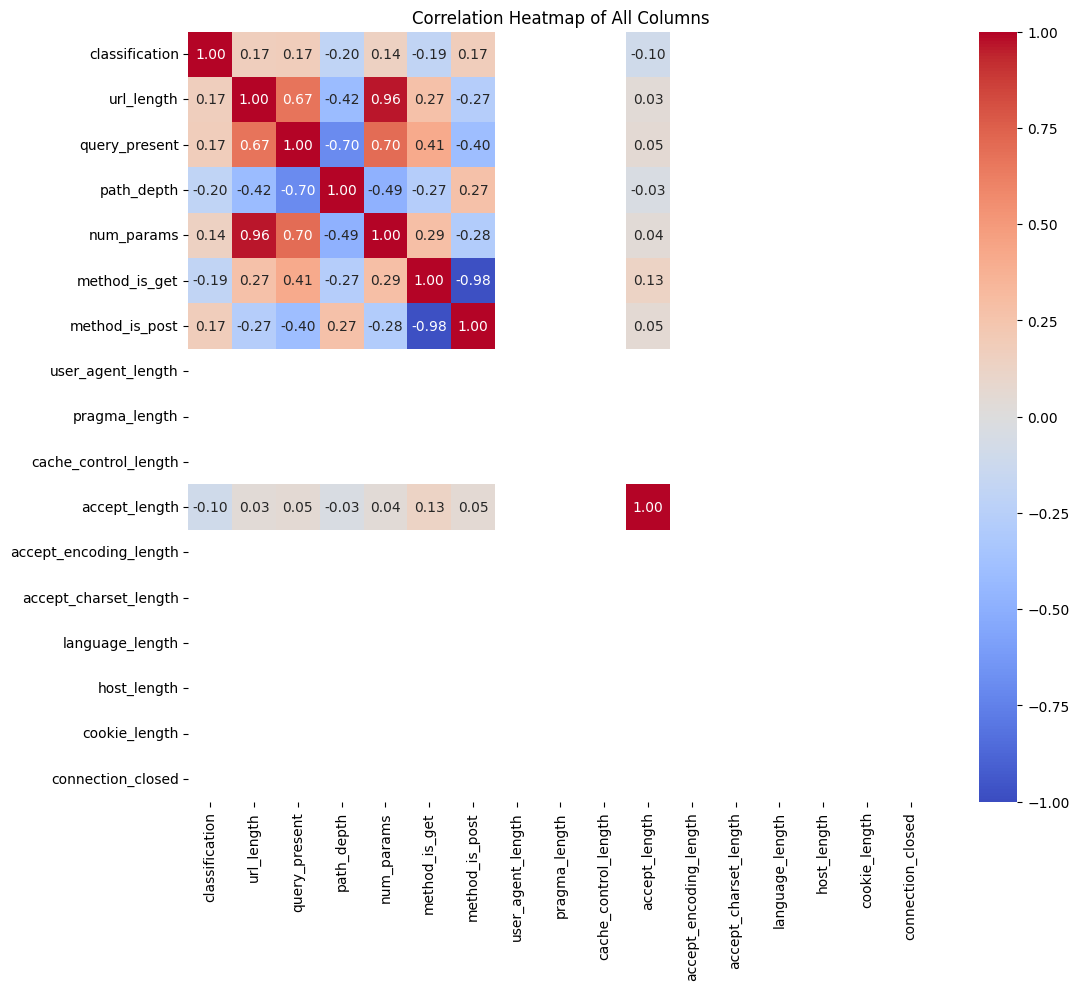


Correlations with classification:
classification            1.000000
query_present             0.174984
method_is_post            0.173813
url_length                0.170397
num_params                0.143699
accept_length            -0.096947
method_is_get            -0.189768
path_depth               -0.198212
user_agent_length              NaN
pragma_length                  NaN
cache_control_length           NaN
accept_encoding_length         NaN
accept_charset_length          NaN
language_length                NaN
host_length                    NaN
cookie_length                  NaN
connection_closed              NaN
Name: classification, dtype: float64


In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from urllib.parse import urlparse

# Load cleaned dataset
df = pd.read_csv('data/fully_cleaned_dataset_no_anomaly.csv')

# Numeric encoding for all columns
# URL-based features
df['url_length'] = df['URL'].apply(lambda x: len(str(x)))
df['query_present'] = df['URL'].apply(lambda x: 1 if '?' in str(x) else 0)
df['path_depth'] = df['URL'].apply(lambda x: len(urlparse(str(x)).path.split('/')) - 1)
df['num_params'] = df['URL'].apply(lambda x: len(urlparse(str(x)).query.split('&')) if urlparse(str(x)).query else 0)

# Method-based features
df['method_is_get'] = df['Method'].apply(lambda x: 1 if str(x).upper() == 'GET' else 0)
df['method_is_post'] = df['Method'].apply(lambda x: 1 if str(x).upper() == 'POST' else 0)

# Other columns (simple numeric encoding)
df['user_agent_length'] = df['User-Agent'].apply(lambda x: len(str(x)))
df['pragma_length'] = df['Pragma'].apply(lambda x: len(str(x)))
df['cache_control_length'] = df['Cache-Control'].apply(lambda x: len(str(x)))
df['accept_length'] = df['Accept'].apply(lambda x: len(str(x)))
df['accept_encoding_length'] = df['Accept-encoding'].apply(lambda x: len(str(x)))
df['accept_charset_length'] = df['Accept-charset'].apply(lambda x: len(str(x)))
df['language_length'] = df['language'].apply(lambda x: len(str(x)))
df['host_length'] = df['host'].apply(lambda x: len(str(x)))
df['cookie_length'] = df['cookie'].apply(lambda x: len(str(x)))
df['connection_closed'] = df['connection'].apply(lambda x: 1 if 'close' in str(x).lower() else 0)

# Keep classification as is (already numeric)
df['classification'] = df['classification']  # Just for clarity

# Drop original non-numeric columns
numeric_df = df.drop(columns=['URL', 'Method', 'User-Agent', 'Pragma', 'Cache-Control', 
                              'Accept', 'Accept-encoding', 'Accept-charset', 'language', 
                              'host', 'cookie', 'connection'])

# Correlation matrix for all numeric columns
corr = numeric_df.corr()

# Heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(corr, annot=True, cmap='coolwarm', vmin=-1, vmax=1, fmt='.2f')
plt.title("Correlation Heatmap of All Columns")
plt.show()

# Optional: Print correlation with classification
print("\nCorrelations with classification:")
print(corr['classification'].sort_values(ascending=False))